In [12]:
import matplotlib.pyplot as plt
import numpy as np

def gr_dataset(X, y, df=None, title=None, show=True):
    """plot 2-class dataset. Different colors for different labels"""
    color = np.vectorize(lambda l: 'green' if l == 1 else 'blue')

    plt.scatter(*X.T, c=color(y))
    x = np.linspace(0, 1, 200)
    if df is not None:
        plt.plot(x, df(x))
    plt.ylim(0, 1)
    if title:
        plt.title(title)
    if show:
        plt.show()


def gr_classifier(classifier, X, y, margin=False, title="?"):
    """plot dataset and classifier margin"""

    # these are to plot the contour
    x_range = np.linspace(0, 1, 50)
    y_range = np.linspace(0, 1, 50)
    x_grid, y_grid = np.meshgrid(x_range, y_range)
    z = classifier.predict(np.array((np.ravel(x_grid), np.ravel(y_grid))).T)
    z_grid = z.reshape(x_grid.shape)

    plt.contour(x_grid, y_grid, z_grid, [0], colors='k')

    if margin:
        plt.contour(x_grid, y_grid, z_grid,
                    [-1, 1], colors='k', linestyles='dashed')

    gr_dataset(X, y, show=False)
    plt.title(title)
    plt.show()


In [13]:
import pathlib
import pickle

def load_dataset(path):
    with open(path, "rb") as f:
        return pickle.load(f)

# ds = load_dataset("experiments/datasets/ds10cd2c5a38af1bdec7e85a50972639c9.pkl")
# gr_dataset(ds.X, ds.y)

In [14]:
import pandas as pd
from budgetsvm import optimization

df = pd.read_json("experiments/results/1680256036.8819602.json")

df["budget_percentage"] = df["model_name"].apply(
        lambda x: float(x.split("_")[0]) if "full" not in x else 1.0)

total_train_time_sec = df.train_time.sum()
df.train_time = df.train_time.div(60)
df = df.rename({"train_time": "train_time_min"}, axis=1)

df_success = df.dropna().copy()
#df_success = df.copy()
#df_success["score"] = df_success.score.apply(lambda x: x if type(x)==float else "0.0")

df_success = df_success.astype({
    "dataset": "string",
    "model_name": "string",
    "optimal": "bool",
    "params": "object",
    "score": "float",
    "budget": "float",
    "num_sv":"float",
    "train_time_min":"float",
})



full_budget_score = df_success.query("budget==inf")[["dataset","score"]]
df_success= df_success.join(full_budget_score.set_index("dataset"), on="dataset", rsuffix="_full_budget")
df_success["score_ratio"] = df_success["score"] / df_success["score_full_budget"]


df_success

,dataset,model_name,optimal,params,score,budget,num_sv,train_time_min,budget_percentage,score_full_budget,score_ratio
0,c909c284a99cdf44d8d51d2ea62d334d,full_budget,True,"{'C': 1.0, 'kernel': 'GaussianKernel(sigma=0.1)'}",0.911111,inf,56.0,0.322209,1.00,0.911111,1.000000
2,c909c284a99cdf44d8d51d2ea62d334d,0.53_budget,False,"{'C': 100.0, 'budget': 29, 'kernel': 'Polynomi...",0.533333,29.0,3.0,39.615680,0.53,0.911111,0.585366
4,4866a56c176db9624e6d8bb02f2de8e1,full_budget,True,"{'C': 100.0, 'kernel': 'GaussianKernel()'}",0.866667,inf,12.0,0.315155,1.00,0.866667,1.000000
5,4866a56c176db9624e6d8bb02f2de8e1,0.77_budget,False,"{'C': 100.0, 'budget': 9, 'kernel': 'Polynomia...",0.244444,9.0,5.0,59.855632,0.77,0.866667,0.282051
6,4866a56c176db9624e6d8bb02f2de8e1,0.53_budget,True,"{'C': 100.0, 'budget': 6, 'kernel': 'GaussianK...",0.388889,6.0,4.0,0.725461,0.53,0.866667,0.448718
7,4866a56c176db9624e6d8bb02f2de8e1,0.30_budget,True,"{'C': 100.0, 'budget': 3, 'kernel': 'GaussianK...",0.422222,3.0,2.0,3.645764,0.30,0.866667,0.487179


In [15]:
import datetime
print(f"{datetime.timedelta(seconds=total_train_time_sec)} tot. training time")

1:53:23.113615 tot. training time


In [19]:
df

,dataset,model_name,optimal,params,score,budget,num_sv,train_time_min,budget_percentage
0,c909c284a99cdf44d8d51d2ea62d334d,full_budget,1.0,"{'C': 1.0, 'kernel': 'GaussianKernel(sigma=0.1)'}",0.911111,inf,56.0,0.322209,1.00
1,c909c284a99cdf44d8d51d2ea62d334d,0.77_budget,NaN,None,Error while training,42.0,NaN,4.900504,0.77
2,c909c284a99cdf44d8d51d2ea62d334d,0.53_budget,0.0,"{'C': 100.0, 'budget': 29, 'kernel': 'Polynomi...",0.533333,29.0,3.0,39.615680,0.53
3,c909c284a99cdf44d8d51d2ea62d334d,0.30_budget,NaN,None,Error while training,16.0,NaN,4.004822,0.30
4,4866a56c176db9624e6d8bb02f2de8e1,full_budget,1.0,"{'C': 100.0, 'kernel': 'GaussianKernel()'}",0.866667,inf,12.0,0.315155,1.00
5,4866a56c176db9624e6d8bb02f2de8e1,0.77_budget,0.0,"{'C': 100.0, 'budget': 9, 'kernel': 'Polynomia...",0.244444,9.0,5.0,59.855632,0.77
6,4866a56c176db9624e6d8bb02f2de8e1,0.53_budget,1.0,"{'C': 100.0, 'budget': 6, 'kernel': 'GaussianK...",0.388889,6.0,4.0,0.725461,0.53
7,4866a56c176db9624e6d8bb02f2de8e1,0.30_budget,1.0,"{'C': 100.0, 'budget': 3, 'kernel': 'GaussianK...",0.422222,3.0,2.0,3.645764,0.30


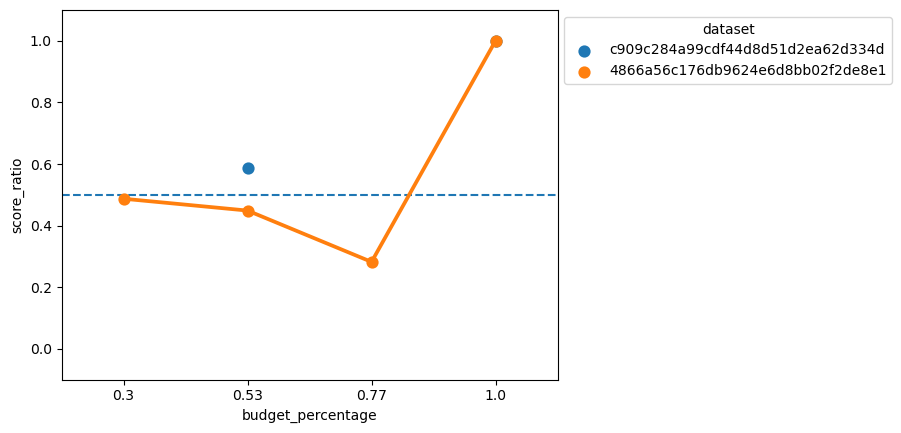

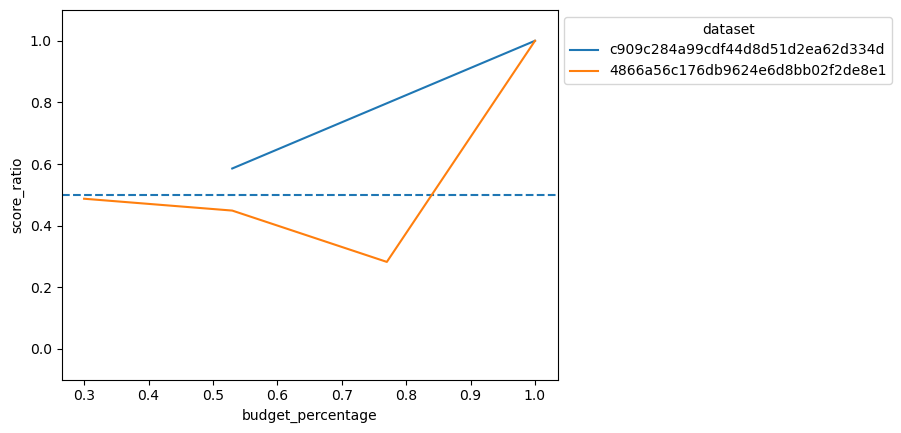

In [18]:
import seaborn as sns


plt.axhline(y=.5, linestyle="--")

g = sns.pointplot(
    data=df_success,
    x="budget_percentage", 
    y="score_ratio",
    hue="dataset",
    orient="v"
)
g.set(ylim=(-0.1, 1.1));
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.show()


plt.axhline(y=.5, linestyle="--") 
g = sns.lineplot(
    data=df_success,
    x="budget_percentage", 
    y="score_ratio",
    hue="dataset",
    orient="x"
)
g.set(ylim=(-0.1, 1.1));
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

In [7]:
df

,dataset,model_name,params,score,budget,num_sv,train_time_min,budget_percentage
0,894f583134aa64a610d94f2357685ba6,full_budget,"{'C': 1.0, 'kernel': 'GaussianKernel(sigma=0.1)'}",0.9,inf,62.0,0.161300,1.0
1,894f583134aa64a610d94f2357685ba6,0.90_budget,"{'C': 100.0, 'budget': 55, 'kernel': 'Gaussian...",0.611111,55.0,37.0,19.938254,0.9
2,894f583134aa64a610d94f2357685ba6,0.80_budget,"{'C': 100.0, 'budget': 49, 'kernel': 'Gaussian...",0.611111,49.0,32.0,20.848004,0.8
3,894f583134aa64a610d94f2357685ba6,0.70_budget,None,Error while training,43.0,NaN,24.426184,0.7
4,894f583134aa64a610d94f2357685ba6,0.60_budget,None,Error while training,37.0,NaN,26.650820,0.6
...,...,...,...,...,...,...,...,...
59,4b9b0c821f73c8745c631c28e998ccb6,0.70_budget,"{'C': 10.0, 'budget': 41, 'kernel': 'GaussianK...",0.722222,41.0,2.0,19.585460,0.7
60,4b9b0c821f73c8745c631c28e998ccb6,0.60_budget,"{'C': 10.0, 'budget': 35, 'kernel': 'GaussianK...",0.588889,35.0,2.0,21.413090,0.6
61,4b9b0c821f73c8745c631c28e998ccb6,0.50_budget,None,Error while training,29.0,NaN,25.675021,0.5
62,4b9b0c821f73c8745c631c28e998ccb6,0.40_budget,None,Error while training,23.0,NaN,28.246064,0.4


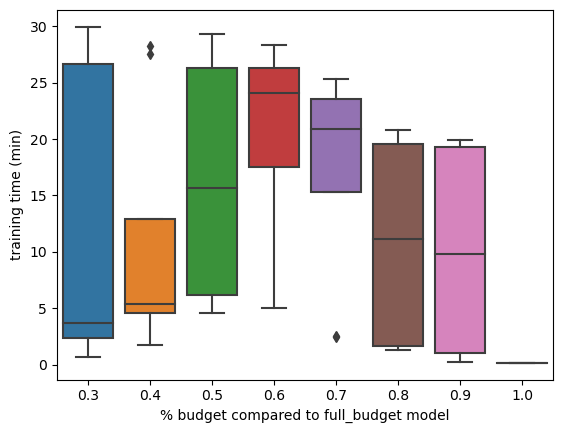

In [8]:
ax = sns.boxplot(
    data=df,
    x="budget_percentage",
    y="train_time_min"
)
ax.set(xlabel='% budget compared to full_budget model', ylabel='training time (min)');